[*********************100%***********************]  7 of 7 completed


,Mean,Variance
AAPL,0.001052,0.000240
TSLA,0.000706,0.001289
NVDA,0.005410,0.001110
K,0.000575,0.000211
CRSP,0.000529,0.001275
NEM,0.001036,0.000469
PLTR,0.004107,0.001701


,AAPL,CRSP,K,NEM,NVDA,PLTR,TSLA
AAPL,1.000000,0.333635,-0.025402,0.151880,0.425429,0.350956,0.434971
CRSP,0.333635,1.000000,0.002130,0.185319,0.233756,0.375929,0.302442
K,-0.025402,0.002130,1.000000,0.079174,-0.156994,-0.046181,-0.045540
NEM,0.151880,0.185319,0.079174,1.000000,0.050834,0.118218,0.083477
NVDA,0.425429,0.233756,-0.156994,0.050834,1.000000,0.366458,0.369591
PLTR,0.350956,0.375929,-0.046181,0.118218,0.366458,1.000000,0.395460
TSLA,0.434971,0.302442,-0.045540,0.083477,0.369591,0.395460,1.000000


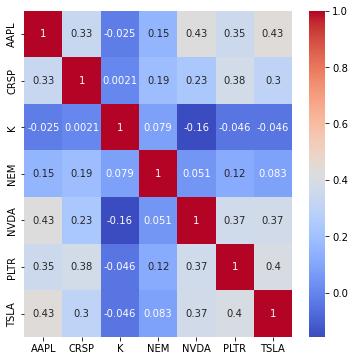

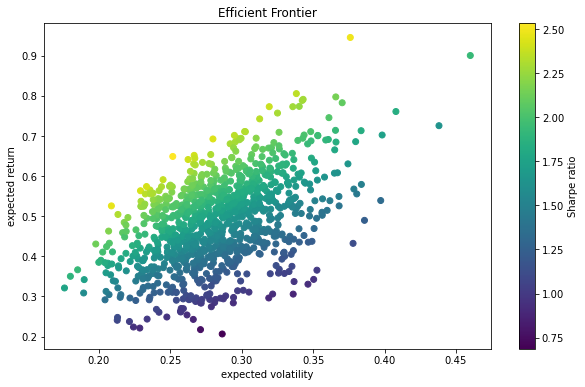

In [40]:
import math
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sn

stocks = ['AAPL', 'TSLA', 'NVDA', 'K', 'CRSP', 'NEM', 'PLTR']

end_date = dt.datetime.today()
start_date = end_date - dt.timedelta(2*365)

price = yf.download(stocks, period = '2y')['Adj Close'].pct_change().dropna()

returns = price

class EfficientFrontier:
    def __init__(self,returns, assets):
        self.returns = returns
        self.assets = assets
 
    def Calc(self):
        self.tbl = pd.DataFrame(index = self.assets)
        self.tbl['Mean'] = self.returns.mean()
        self.tbl['Variance'] = self.returns.var()
        return self.tbl.T
   
    def correlation(self):
        self.tbl = pd.DataFrame(index = self.assets)
        self.corr = self.returns.corr()
        return self.corr
    
    #code taken from https://www.youtube.com/watch?v=Isutk-wqJfE
    def PortfolioReturn(self, weight):
        return np.sum(self.returns.mean() * weight) * 252
    
    #code taken from https://www.youtube.com/watch?v=Isutk-wqJfE
    def PortfolioVolatility(self, weight):
        return np.sqrt(np.dot(weight.T, np.dot(self.returns.cov() * 252, weight))) 
returnCol = []
volatilityCol = []
weightsCol = []
sharperatioCol = []

ef = EfficientFrontier(returns = returns, assets = stocks)
    
for i in range (1000):
    
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    weightsCol.append(weights)
    port_return = ef.PortfolioReturn(weights)
    port_volatility = ef.PortfolioVolatility(weights)
    returnCol.append(port_return)
    volatilityCol.append(port_volatility)
    
ER = np.array(returnCol)
EV = np.array(volatilityCol)
sharpe_ratio = (ER - 0.01)/ EV

display(ef.Calc().T, ef.correlation())

plt.figure(figsize=(6, 6))
sn.heatmap(returns.corr(), annot=True, cmap="coolwarm")

plt.figure(figsize = (10, 6))
plt.scatter(EV, ER, c = sharpe_ratio, cmap = 'viridis')
plt.title('Efficient Frontier')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe ratio')
plt.show()
